In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#Reading the datadata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlAAAAI/CAYAAAC4QOfKAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nO29b4xmx3Xe+RSHI7spGW4JGjtS2xK5QUAGNtecsNdrYIJAnASSEwb2mIwtCNhdBWssHSAGIq1AuO0PKzm7AXuXsZl88oKBvZYRxabWI9OOGSwjeGg4HkAKekTKklckgoQS4SYhjiGOLImz8nBY+6H7Hfa8c//Un3OqTtV9foCgYXe/7617b9Wpp845dcp570EIIYQQQsK5qXYDCCGEEEJagwKKEEIIISQSCihCCCGEkEgooAghhBBCIqGAIoQQQgiJhAKKEEIIISSSm0te7O1vf7u/9dZbS16SEEIIISSJCxcu/Ln3/sTQ74oKqFtvvRV7e3slL0kIIYQQkoRz7itjv2MIjxBCCCEkEgooQgghhJBIKKAIIYQQQiKhgCKEEEIIiWRWQDnnvtM59x+dc593zv2pc+4XD39+m3Pus865/+Sce8w59yb95hJCCCGE1CfEA/VtAKe99z8E4C4AP+qc+xEA/zuAR7z3fw3AKwB+Wq+ZhBBCCCF2mBVQ/oBvHv7n8cP/eQCnAfz24c8/DuCMSgsJIYQQQowRlAPlnDvmnHsGwMsAPg3gPwO45L1/7fBP/gzAlk4TCSGEEEJsESSgvPdXvfd3Afg+AD8M4K8P/dnQZ51zDzjn9pxzexcvXkxvKSGEEEKIEaJ24XnvLwH4QwA/AmDTObeqZP59AF4c+cyj3vtt7/32iROD1dAJIYQQQpoiZBfeCefc5uG/NwD8HQBfAvAUgH9w+GcfBPC7Wo0khBBCCLFEyFl47wDwcefcMRwIrk9673/fOff/Avgt59z/BuBpAL+q2E5CCCGEEDPMCijv/Z8AODnw8/+Cg3woQgghhJBFwUrkhBBCCCGRUEARQgghhERCAUUIIYQQEgkFFCGEEEJIJBRQhBBCCCGRUEARQgghhERCAUUIIYQQEklIIU1CFsfjT+/j4Sefw4uXLuOdmxt48H2348xJnpdNCCHkAAooQtZ4/Ol9/PynvoDLV64CAPYvXcbPf+oLAEARRQghBABDeITcwMNPPndNPK24fOUqHn7yuUotIoQQYg0KKELWePHS5aifE0IIWR4UUISs8c7NjaifE0IIWR4UUISs8eD7bsfG8WPX/Wzj+DE8+L7bK7WIEEKINZhETsgaq0Tx3F143MlHCCH9QgFFyABnTm5liR3u5COEkL6hgCJN0Jo3Z2onn+V2E0IICYMCiphHwptTWoBp7uRrTUwSQkiPMImcmCe3LtNKgO1fugyPNwTY40/vK7T2AK2dfDXuhRBCyI1QQBHz5HpzahTG1NrJxyKfhBBiAwooYp5cb06NwphnTm7hofvuxNbmBhyArc0NPHTfndmhNhb5JIQQGzAHioihlZvz4Ptuvy4HCojz5rxzcwP7AwIjNpwWe3+5O/mGkLoXQgghedADRUTQzM3J9eYMhdMcgHvuOBHcBiu5RyzySQghNqAHioiQum0/1KuT4805c3ILe1/5Gj7xmRfgD3/mAZy9sI/td78t6HulyhLkeumkinwSQgjJgwKqE2pvbU/JzSlZbPKpZy9eE08rYgSQRO6R1P1qhAYJIYTEwRBeB1gIL6UkepfcUZYrgCTKEnAHHSFEi8ef3sep3XO4becJnNo9x9ImBaCA6gALE3NKbk7JHWW5Akgi94g76AghGlhYRC8RCqgOsDAxpyR6axWbHCJXAEmUJSh5v4SQ5WBhEb1EmAPVAVa2tsfm5uSWJ4htG5CXfD12f6H5ZyXvlxCyHCwsopcIBVQHtDoxp4qa1IR5jeTrmMRw7qAjhGhgZRG9NJz363uT9Nje3vZ7e3vFrrckau/CK8W6YAEOxKJEle8UTu2eGzRcW5sbOL9zunh7CCHLQ9suLmV+GcI5d8F7vz30O3qgOmEpW9ul6jFJQdc5IaQ2mt7tkuVmWoMCijSFVD0mKUND1zkhJAYtb47WItraotUSFFAkitqu3FzBIr2aajX/jBBSnlD7U9vOHoVe9nFYxoAEo11rJKQQXG45AuntvhLlDQghyyDE/lir6cTyK+PQA0WC0XTlhq7McmP9GquppeSfEULyCLE/1kJm9LKPQwFFgtF05cYYjRzBwpwlQkgtQuyPtZAZy6+MQwFFgtEUH6WMhuXVlKW8B0KIPCH2R8vO5tgXetmHYQ4UCUbiPLgxSsXZJXKWNA7ttJb3QAiRJ8T+aNhZ2hcdWEiTAAhfnWh5SawVyBxDq50syEkIWSFtZ2lf0mEhzU6RGmSxx5FoCJqQOLuFEJdWgqe1vAdCSD2k7Sztiw4UUI0iWc/Iyq6PKaNRohpuiEDTMkRMbieEaJFqXywsWi3DHKhGkaxn1MLqRLp+0zqhOQJauVqa+WWEkGWTYl+YNzUPBVSjxIqeqcTnWFGQk0Sd+lltkRcq0LSEDgtyEkK0SLEv2ovWHmAIr1FiXLJz4a+Yrf05obScz2qHuEIFmmZNFG4VJqRdrIe7Yu1LC5GJ2tAD1SgxnpC5lUTM6iRnVZLzWe0QV4wX7szJLZzfOY3nd+/F+Z3TpowkIaQ8pcNdGqVU1uERLvNQQDVKjOiZW0nErJxyViU5n9UOcTEHiRCSSslwVymxRps4D0N4DRPqkp0Kf8WG1XJCablhuJD7TXWj87gCQkgqJcNd0rumx2wmbeI8FFDKWIiLT+U4xQ7GnKNQtI9RyS11wBwkQkgKJcsESIq1OZtJmzgNQ3iKWNkGOhX+ih2MOaE07TAcd40QQmowFO4CgG99+7VRe586P0jmJtFm5kEPlCK5rlZJ79XYSiJl5ZSzKtFc0XDXCCGkBiub9ov/9k/xyqtXrv380uUro17w1PlB0pOfazMtRFhqQg+UIjmdU8J7FbJTo6dEQe4aIYTU4szJLdzypht9EmMendT5QdKTn2MzrURYakIBpUhO58x1rYZ27p4KOPYkBgkh7REjinLmB6lSKjk2k+E/hvBUyXG15rpWY9zDvSQKctcIIaQmMSkRsQWMtYr3Amk2kykTFFCq5HTO3C3/2p3bauy7FzFICGmPGFEUOj9oH6SeajN5ADoFlDqpnTM3UVCzc2sNaKuijBBCQohdNIfMD9J1n6TQLkvTAhRQRlkfiN+9cRzOAR9+7Bk8/ORzs+JCs3NrDGjtVVZMO0KNHwUfIWQdaS947mYkLRvFlAkKKNOsBmKKuNDs3BrhQQurrJjnbEXwEUL6JqdIp7aNWnrKBHfhNUDqbgetQ281ygVYSEiMec7cgUIIKUHqTjnaKH0ooBrAgrg4ika5gFxRJnE6ecxztvZOCCF9klpqhjZKH4bwGiDUhZsT7475rEZ4MCdnS8pVHeMq5w4UQkgpUkJltFH60APVACEen5yqsCmflQ4P5hT0lHJVx3jWWLSTEGIZ2ih96IFqgBCPT04StoUEbiA9IVHKVR3jWeMOFEKIZVqxUS3vZqaAyqTUy58TFzkiovVYuaSrOkbELX0HCiHENtZtVOu7mSmgMrD08nNEROuxchZ0I4RIob0otuxxKd02K9GPVJgDlUFK7o3EbrEhcuLdrcfKezoQmRBSj9xc0jnbnvP92mi2bezZtB79oAcqg9iXr+mxyol3a8fKS6xqJF3VlleIhBA9Uj0iobZdwuOiZZ+0vEFTz6b16AcFVAaxL1/bXZkjIrRi5dphTmljYiksSwgpS6pHJNS253pcNO2Tljdo6tm0nn7BEF4GsaGvVt2VOWFHzWq4Gi5nVu8lZLmkFvQNte25BYM17ZPGCRPA9LNpPf2CHqgMpkJfQ56RFt2VuSseTdGo4dFrVeQSQvJJ9YiE2vZcj4umfdLyBs09G+s7BaeggMpk6OWPiY77797C2Qv7kx3UWv5NrkjRFI0axqRFkUsIkSE1HzRUfOTmm2raJ61c2NbDdFNQQCkwJjqeevYiHrrvztEOajH/JlekaA4eDWPS82AnhMyT4hGJLcKbas+17ZOGN6iVgp4pUEApMBfzHes4tWtiaIQdNQePhjHpebATQvQoEYqyYJ9SoiQth+mmcN77Yhfb3t72e3t7xa43h1a47NTuuUHRsbW5gfM7p0c/d9vOExh6Gw7A87v3ZrdrinXvF3AgRsbCjg/ddyeA+kLDWsiTEEJ6ZWyeaCnxOxbn3AXv/fbQ7xbrgdIMl2knImoQG3YEYCLc2OvKhhBSltTFmNVFnEa7akdJrLFYAaXZEbQTEY8iNUhiw46nds9xIBFCuiB1QW0xb1WzXdylfD2LFVDaHSHGM3JUBG3echzfcfNN+PrlK7OCSHKQxHq/OJAIIb2QuqC26pHRahd3KV/PYgtpahUNi2W9GOQrr17Bt197HY+8/y6c3zmdPHhjiS0KauX5EUJILqkLQqsLSa12tX5uqjSLFVBWOkKOCJIcJLEVYa08P0IIySV1QWh1IanVrth5IucUixZYbAhPejtoai5SjgiSdqfGhB0tbKclZElYTVbugdSNP1brxmm2K3SesJofJsliBRQgt4Mrp6PkiKDag7fUDjhOHGTpLGEyqknqglBiIalh3ywscK3mh0my6DpQUqTWfQLy62q0Li7m2r/EuiOErJNjY4hderZvNesaSpJVB8o59/0AfgPAXwHwOoBHvff/0jn3MQD/E4CLh3/6C977fyfTZFvMTfI5YbjclUKuF6imAAtZVaesYjTvqXXB2jO1+7Lmta0mK5M8evbSLGHHXkgI7zUAH/Hef845910ALjjnPn34u0e89/9cr3n1CZnkJY47qTFYaocFQoxH7MSheU+1nxcZp+a7KXHtJUxGvTIlrnsWxrVTTEowuwvPe/+S9/5zh//+BoAvAVjMbBGyS67VHWmSZRBSCDEesbtJNO+p9vMi49R8NyWu3aqNWTrrZWpW4nq1G83qLj4JYnfstUhUErlz7lYAJwF8FsApAD/rnPsfAOzhwEv1inQDaxMyyVtI2Euh9uonZFUdu4rRvKfaz4uMU/PdlLh2qzZm6cx52Vv00sSEq3s/aitYQDnn3gLgLIAPee//wjn3KwD+VwD+8P9/CcD/OPC5BwA8AADvete7JNpclFDXeYsdpXZYIMR4xE4cmvdU+3mRcWq+m1LXbtHGLJ05cW1FGIeKIqYxXE+QgHLOHceBePqE9/5TAOC9/+qR3/8rAL8/9Fnv/aMAHgUOduHlNrg0JVYItZJfa69+Qo1HzMSheU+1nxcZp+a7Yb/oDymbHCKuawvjGFHUc9J7CiG78ByAXwXwJe/9Lx/5+Tu89y8d/udPAPiiThPror1CyFH0uYPcwupH2nho3pOF50WGqflu2C/6QtLL0oK4jhFFTGO4ntk6UM65vwngPwD4Ag7KGADALwD4AIC7cBDC+zKAnzkiqAbptQ5UjpBJre9isX4It/gTQlpHuuaW9bIqMfWacp9Ni3NEVh0o7/0f4+BZrtNlzadYclcrqYremiuVsXHSKy0afZKOtJdFK0QnZXNjcvhyPGo9zhGLPUxYitwtzKnbWLVdqbGHQHKLPylB6cNJ57ahk/5opbSAlM2NKZGRU5qgxzli0WfhSZArZFIVvebOn5SVgqXYOD0GfVJjBWvN00v0aSFvCZCzubE5fKkeNUtzhBQUUJlIVCEH4hNQNQd5yqRhZYt/j25ickANMVPS6FP426DkpoDYd370729yDlcHcphTbG6JnYBW5ghJKKAykRAyKZ1Xc5CnTBpWVm30GPRLjRVsKaNP4W+LEoIi9p2v//2QeLLoKVthZY6QhAIqk9rbpzWukzJppD4H6VV3j27i1ilZU0eaUkY/V/jTe9Uese986O8B4JhzeN178++9x3IfFFACSAkZK0YwddKIfQ4aq+4e3cQtY6mmTsr4yjX6odfMEf70XpVFyk7HvvOxn7/u/Q3lBqxSu2ioNIsTUFZEylC7Uoygxv2UWilohNt6dBO3jOQ7zumXOSIj1ejHXDNH+DNsXQ5JsRr7zrk4tMeiBJTmSi1XyKQYQc37KbFS0Ai39egmbhkrNXVqiIyYa+YIf4atyyHZj2LfOReH9liUgNIyohJCJsUItr7y1FpR9eYmbhkrq+YaIiPmmjnC38ozXgKx/WhqYZ1SPiDm74k+ixJQWkZUQsikGMHWV55cUfWPlXdcQ2TEXjNV+Ft5xksg5p2GLKxj33mtxaFkqojVNJoUFlWJXKvCrISQiakGu6KVirlj5FS1laJ0ZeulYeEdA2njq5VrWnnGSyDmnfZSeVuyGn9vlf1nDxOWpPZhwmMH8N5/9xaeevZisiKWOnwypaiatQOFW4LPb1nUWPn2tNomB8y909Xvh+YEYPiQXstIHq4sfVBzCbIOE+6JoRjyPXecwNkL+1n5S1Iu9BR3LqC/xTr3MzloXq/1HDISR43wB/Px+mPqnQ4tytaxFCEIsa9jQnDs51O0nnayzqIEFHBj5z+1ey57Em2xmGZK4nvpejPa1+ttMJNp6A0iQPlF2VEs5aaF2tdjI0fGHHMu+pq9bXhYnIBaR/JAxpaMcYr3pbTHRvt6vQ1mMo6EGC8lwCj09Ki1KAMOwlSW3mWofR0ST1M/nyI1WmN1TCwqiXyI1hOxU0kRjqU9NtrXq5FYTOqQm9BbKvm1tyRba2gndo/NG6scHwuT/opQ+7o1cU+xpGx4sDwmFi+geppEY3aUpQjH0mJT+3rcvWQPrV2RuWK81I6qXnZuWcXaoiynv+eOlVD7Kj1Hnjm5hfM7p/H87r1BotLymFi8gOplEo1V6SmDorTYLHG92MFM9AjtwykTR64YH5tg9y9dNiX0yDSWFmU5nhUJr0yofa09R1oeE4vPgQLay18aIjZfKCXxvXSyPCvvLouQPpyaw5K7U3YsXy6mDTnX6T2loBQlio6Gzic5OZ4S+aEx9rXmHGl5TFBAFaBEAlyKSk8ZFNIDae7Z9CBuSRghfTh14sgV40MTb2wbUq/TakqBRSwtynI8K0va/GR5TFBAKVNq679llT5G6bIIxDYhfThn4siZLI5OvGOeqKE2xC6eLE3wvWJFNOTYbKv2XsNZYHlMUEApU2rrv2WVPkbqswkdpFa3vpJhQvpwzYljNfGOVVNeb0PqAmGuUCP7dB/k2GyL9l5zQWxF9K6z+CRybSSruE5RK9EvZydIijchJtHY6tZXMkxIH7awaza0DdK7h9in+yLHZqeWA9A899PybjktuvFAWV2ZSVZxnaO0Ss9dcaR4E0K9VjympU3m+rAFd35oG6R3D4316Y988vP48GPPmLJ7JIzcsHJMEdgQW50zj1reLadFFwLKci5NbhVXq8IQyBcpKW7o0EG6xMG8FCy480PaIB1uHOu7K1tiye4RW2jucF2R298tz3VjdBHCs+w6zKniat1lnytSUtzQoXVcllphnthhLNR3zx0nkkIpIX3Xit0jtsjd4RpCTnjd+lw3RhcCyrK3IadTWRaGgIxIiS1kGfo8LeTKkGUztEC4/+4tnL2wnzRRDPXpISzYvRbRzhGq2Z4QW11jQbzC+lw3RhchPKtbOoG8nI3UJOtSbtAaO0FCn6eFXBlC1kN9p3bPJYe91/v0TSP5lRbsXmvEhq+07ax0WkqpHa6p4XXLTpApuhBQ2hN57mBJ7VSxHbp0LlgtkRL6PC3kyhByFIlV/ljOCkAvayox+Zwl7Kz0JpgQW12zNIJlJ8gUXQgozYm8ZoJ6bIeusfOMIoVo0mJi6RSSEwW9rHLECNsSdlbDI2N5h6vFulYhdCGgAL2JvOZ2+NgO3aoblCyPEGFUcvFSSqhJTxRcwMgQI2xL2NlaHpla/anVxUA3AkqL2qIkpkO36gYdojfPA3mDUGEksXixJtRanSh6J0bYlrCz1jwykvZ47LtaXAxQQM3QkijRGHQ1hIzlul4knvU+9OpfvhYkjHIXLyWF2tFrhmxwYD+2RYywLSFuLAltSXvcm22ngMK00bO2EphCetDV6uxaYVN6tcoz1IfGWBdGuYuX0H4k5WXubXJYGjGbUwB9cWNFaEva495OiFi8gJozepZWAiFIDrpanV0jbMrJrQ5DfWiMdWGUu3gJ7UdSXubeJgcyjhVxUwJJe1w7JUaaxQuoEKO3pMFyFIkQSorw1AibcnKrQ2hfGRJGuYuX0H4k5WXubXIg+fTg9Za0xy2lxISweAElafRCE1ZbGVA5nT3H46MRNuXkVoexPrS5cRxv/o6bZ8dBzuIlpB+txuPlK1evHfy9lTguU8eLhE1oya4shV683pL2uKWUmBAWL6CkFHHIYEkdULWMY05nz/H4aIRNe1v5tMJYH/rYj/1A9TIg6+PxqvfX+rdWted1JCbZXibqGmja1lJeb+35QdIet5YSM4fzA0cBaLG9ve339vaKXS+EsWq+oWf4rDi1e25wgt7a3MD5ndPBf6PVvhCGBiKQ1tlv23kCQz3LAXh+917RdodQ8jmS67HqHUkZj3PE3qtEGzTuYwlo24QSNpB2TR/n3AXv/fbQ7xbvgZJSxCEhopQwUslVzNAq9qH77kwywtY8Pr2tfFrCag5hjWrPGm1geDoNbdtawgYyt7MuixdQgIyBDxksKQOqlHGUHogWY91WJ3JSB8kJruaGCWuLlVbQtq0lbCDFc11uqt2AXnjwfbdj4/ix6362PlhC/madMSMobRylB+KZk1t46L47sbW5AYeDcMKQW/nxp/dxavccbtt5Aqd2z+Hxp/eTrkdILFPjMaZfrry3+5cuw+MN721IX06xCRrfsUS0bWuoDcyh1PygSctzAD1QQoSEiFLCSKU8ORqr2DmPD5NfSSgaeVRj4xFAVL+svWGC4ek0SlUU13wPMfdgMRex9Tlg8UnkLVCi448lI95/9xaeevaiyrWZ/EpCKJ0oG9svrW2YWMfixGkFC88mtw0p5z0CNpLNW5gDmETeOCVyd4ZWsffccQJnL+yrrQ5K1+AibVI6UTa2X1rOQWp9ha9N7bxIifcTcg9Wk81bz+FiDtQELcdmUzhzcgvnd07j+d17cX7nNJ569uLooJNAKn6fk4NC7FPayMb2S8s5SFMTJ6lPqfdjVai0nsNFATUCJ+Uyu1RCJ54pMctJom9KG9lYQVQiWTgVqxNnD0gssCWOywppg9YYyn0GlhcfITCEN4JVl2dJtEMTocmvc25uThJ9U7okRkpSdu1Q0BiWw4stExN6m0ovKHVclsYYkgo/Au1ugKCAGkFqUi5xPp5W/o+VXSpzYpaTRN/UMLJWBVEsFuux9UDoAntOZJQ6LktjDEk5GUJ2a1sVWBRQI0hMyprn48VcI6a96x31ofvuDO68Wh19TsxykugfC4LG2qG/Id/V+grfKqEL7DmRkfN+Yhf5Y2MotU+W8Pxb3wSxCAGV0kEkJuUQhZ6r4qVWAblHuWh29Dkxy0miD2LGaejfSgkWa4f+xnyXBfHZG6EL7BCRkfp+Si3yNa8/h/VUmu6TyFOTwSUSQ7XOx4u9Rgi5idiaidwhiYbrOwgtDC4STsw4Df1byY0gEv1bcoxw40RdQpOfNTdASCRgh/ajoWTxEgng1vNbuxdQOYYmd1IOGTy5A0xqgFoRckNY3uVEZIgZp6F/KykyNA/93b90OXoXk/WJpXdCbZKmyCi1yB9biABY/FE13YfwahqakDBgbqhQKv8n1x1bYsceBVO/xIzT0L+VHPuah/4CuGFishA+IdOE2CTt9IJcuxjSj6YWItrefuv5rd17oGoq2JAVQu4qQso7k7tSaqWex9KKo7ZCzDgN/VvJsa916O86oR6yVsZbK0zZhVybMRfJqGmTQvpRTSeE9ehD9x6o2go2dJWiuRMntJ1A+kqphURu6zs6lkzMOA39W8mxL9G/179j7BTSkImphfHWClN2AYg7WFry2iXeZUg/qu3ttBx9WMRhwpbrSORg9YDIXLTeVwsHVy4Zy7vwNGB/tMHUewCg+o5a6AOp84zlsRfD4g8Ttqxgc7C+xTMFzRUZE29tEzNOQ//Wgnd3jNrecXJAil2Qshkt2KQUb2dtz1opFiGgeqWFwReLpiis7Yom7VBiAmAYzgZzdkHTZrRik2IXIj0u7ofoPom8Z6xv8UxBUxQy8dY+VpL8S9VZYv2y+kzZBW2b0atN6nFxPwQ9UA0jHQLICVlIhTs0V2SxK/5eYvitYMntv5QJgITZBa18u5peyFT7FvK5GDvesp1dRBJ5Cq281LF2xrY/JyFdMpndSmK8lXYsCUsJtZbaQuzTmr3ISQwP+Zz039VkKomcIbwBJI+AiL1ubPhiKASQ0v6ckIVkuMNK3Q8elVEeS16fXkMrRAdteyEd2k5tb+jnQu1463aWIbwBaiTASYYvUtqfM3lJT3wWdk1amsyXgqWEWsnQSivebJKOpr3QCG2ntjfmcyF2vHU7SwE1QI2XKinaUtqfM3lJT3wWJhxLk/lSsLatX0LIW8rrInpo2guNBX1qe0M/F2rDW7ezDOENUGN3m/S5XTE/B/JCFpLhjlrh03UYwimPlfCtJK2HKEgYmvZCY0Gf2t6Qz8XY8NbtLD1QA9RYCUsq8ZT254QsJMMdVuqHsEZPHSyEbyVpPURBwtC0FxpemtT2hu5YDLXhrdtZCqgBarxUa+d2pVxT4vstTTi9Tea9YyH0u07rIQoSjpa90FrQp7Z37nOxNrxlO0sBNULplyotemLbbyVXgxMOScFK/13HWl4XaY/WvDRLsuGsA0UA2Kl700JdEGIPyf4r7cmy6BkjRIvebPjiDxMuTYsGUzp0lvoM5lZb2s+2xXdH5Pqvhier5RAFKYuG/Slt01rzmOVAASVM7VBC6mCRdLvmPoOxCUf72dZ+dyQdqf5rZRMDWR4a9kfrO+fmmKUsGljGQJia25ZzSgDEbiedqoyr9Qy0ny23nLeL1HZoS5sYyLLQsD/S39nSKR0loAdKmJoGOGf1HON2nVvVaD0D7WfLybNdpMIGS0qAXSKWQ/Qa9kf6OyU8tLnntFqKDFBACVPTAOcOllC369wg0noG2s+Wk2fbSLKY3lEAACAASURBVIQNuGuuXyxPxICO/ZH+ztw5JuUdWA6rM4QnTM3KqqUqqM8NIq1noP1sW6+KS/LpsRo6OUAqnKUVTtKwP9LfmTvHpLwDy5EBeqAyGXJHPnTfnVXcxKVWz3OrGq1dGNq7O5a0e4SMs5QE2KUhMRFrerE07E9sasbc3+XOMaXPadVm0XWgcuPhFutdlIjxa9235fwEQkjbSNQKs1IvT5oYm55jp1OeX+15lnWgBpBYSViMzZZYPWuslKznJxBC2kbCQ285nJRD7Pl1qTa59Dmt2ixWQEmIn14HUwjSQs2iGCWE9IPERKwdTqrlhS81l+UcYmxxHlisgJLoMCmDiWGqYZYsRgkhZcidiDXzTGt64UvmGVkVQyksdheexI61lOKTc0XIrBYM06bUDkJCCElFc5dmzUK+3IGcxqwHyjn3/QB+A8BfAfA6gEe99//SOfc2AI8BuBXAlwH8lPf+Fb2myiKxkoh1R86FqUqsQKx6wFh/hxDSAlMelBz7WtMLbznPyDIhIbzXAHzEe/8559x3AbjgnPs0gH8I4A+897vOuR0AOwB+Tq+pskh1mBh35NwA0c4DspyorZWYToNACClBrn2VCKPl2Lx1G7zyfGmemdc6swLKe/8SgJcO//0N59yXAGwB+HEA7zn8s48D+EM0JKCA8rHYuQGivQKxnqgt+T4si0VCSH/k2tdcL3yuzZO0mUuxv1E5UM65WwGcBPBZAN97KK5WIut7pBvXG3NxZu08oCUlatc+1HmJeWyELJkxO7p/6XKQPcjNr8q1eZI2cykHswfvwnPOvQXAWQAf8t7/hXMu9HMPAHgAAN71rneltLEb5sJU2nlAliu6DtFiPsFSVl6E9EZuyGnMvjrg2s/n7EGIF36snbk2T9Jmpn5Xa2G/IAHlnDuOA/H0Ce/9pw5//FXn3Du89y85594B4OWhz3rvHwXwKHBQiVygzU0zNUDGBBZwUME1t1OVTtTOGQwW8glSsB4mJYTciMTCZ8i+OgDrk16OPZhqZ67Nk7SZqSV+Wlt8zobw3IGr6VcBfMl7/8tHfvV7AD54+O8PAvhd+eYtjzMnt3B+5zSe3733Wmn7udIHMd9d6qDUkJINU+S6gFO25UqE3pYUJiWkFyRCTkP2dcxjkGoPptqZW4ogpSzPmL1MaUuLYb8QD9QpAP89gC845545/NkvANgF8Enn3E8DeAHAT+o0cdlIezRKJc7ntjtXiMTu6pNa/bQWJiWEyC181u3r2NlvqfZgqp25O5ljDx6espcpbWlx8RmyC++PceCJHOJvyzanXbRitxY7Vci95rZbQojEiEUpocp6VoS0h9bCJ8QexMwdc+3MXSCHfj7EXsa2pcXF52IrkUuSG66awlqF7tB7zW136cq4kivQUmFSQogMWvZmzh7Ezh1WKoZrLOyt3FsMiz0LTxLNxGFrHo3Qe81td+nKuJKrn57OeiJkCWjamyl7EDt3WKkYruEtsnJvMVBACaAZZtPqVKkhx9B7lWh3SSFiTagSQspSY+GTMndYWKBp2UsL9xYDBZQA2rFb6U6VkzAdc68tDYYWVz+EkPJI5ru2mPcD0F6uoIASoDXvRU7IsbV7jaElwUcIKY90raKW7WmKvWytUOYcFFACtKbGc0KOrd0rIYRIMbb4/MgnP48PP/aMaumAWkiJnhYLZc7hvC9XHHx7e9vv7e0Vux4ZZqw2ydbmxrXinZaxtIqx1BZCiC637TwxWhxzxcbxY93svF0XPUD6/bU67zjnLnjvt4d+xzIGC6TF7aIrNEtGtNwWQog+IblJ1qtnxyBZHdxiTcNcKKAWSMu1iiyV+7fUFkKIPkOLzyFqiQKJ46iOIil6rNU0lIA5UAKkhnFqhn9aTZi2tIqx1BZCiD7rOUs3OYerA2kwEqIgdn7QyDGS3CXYcsL8GPRAZZIaxlly+CdnlWRpFWOpLYSQMhw98P2XfuqHVNIhUuYHDY+4ZLpHy5GPMeiByiS1JIBm9XLL5K6SLK1iLLWFEFIerV10KfPDnEc8JeIhfX+tRj7GoIDKJDWME/u5XnZ75QpHS9t+LbWFEFIHDVGQMq9MhdtyFq69iR5JKKAySY0Rx3yup/oZEnlDlga0pbYQQvogZV4Z8ogfP+bwrW+/hg899swNf68R8ehloR8Kc6AySY0Rx3yu9G4v6Z0cR6mdN6R5b4SQPpmzG9J2JWVeWc8xeustxwEPXLp8ZfQzkhtelpjXSwGVSWpiXMznSu720h4ENWtQLXGAE0LymLMbGnYlZ15ZJbjf8qabceX16bKfkgvXJZZ1YQhPgNQwTujnSh44qZ3cXjNvaKmJ+4SQdObshpZdyU0PmFtgSy9cl1jWhQKqAUru9pIaBFOx8Fp5QyXujRDSF3N2w6pwGFt4AwceLWm7VXKhbwWG8BqgZP0MiRwlq6Gynu+NEKLDnN3QzutMza8aS5f4F++/C+d3TovPHy0fEZYKPVCNIO21GfOiSHi7rIbKer43QogOc3Yjx67MebNzyw8A5dIlpq7Xq9eeAmqBhAzKnM5u1aXd870RQnSYsxupdiXUDufWzSspVIau11MZnnUooBbI3KDMHXSWY+E93xshRIc5u5FiV0LEUekFm4anqGevPXOgFoj2oOw5Ft7zvRFCyhFih0Pyq6RqUGnld/bstaeAWiDaSY/aSe81i2H2eCAmIaQ8IXZ4bsEmKXq06jjVLp6sCUN4ylhMnitRFkEr9m4hns7jWwghuYTY4bn8KsnwmJanqOdD1ymgFNGe7FPFWWzSoyUR2HM8fR1Lz50QIkuoHZ5asEmKHq38zp4PXaeAUkRzss8VZ6FelBIenxihYDGeriF0LHjaCCG6WNrUoukp6tVrzxwoRTQn+1LnDmlfJzaGnxJP18yZ0kq8XOK5UoSQOCQ3tTC/Mx56oBTR3PJeyhOjfZ1YL13sKknbk6PlZbToaSOEXE/tMLt0eGzKU1T7Xi1CAaWIpku0VD0i7evECoVYg6GdM6UldFhvihDbWAmzr4uelcedKQX6UEApopE8t1oF7F+6DAfAH/mdxs4G7R0UKUIhJp6u7cnREjo971whpAdiF2clPDhaQmdJm3dioIBSRjJ5bn1weOCaiNI4XRvQ30FhUaDFoNX+nneuENIDMYuzUh4cphSUhQKqIYYGx0o8nd85rXZdzR0UrQs0zfb3unOFkB6IWZyV8uAwpaAsFFAN0esqoGWBtroGhQ4hyyJmcVbKdjOloCwUUA1haRXQ0o4MChxCiDQxi7NStpspBWVx3vv5vxJie3vb7+3tFbteb6zH0YGDwaFVq2NMJJVuByGEtEyIzZRalLa0uG0B59wF7/324O8ooNqi1OCYGvCrXYDraOdiEUJIq0zZbi5K7UIBRaI5tXtuVCS9eFh1ex0H4Pnde9XbRgghPTFlb7korcuUgGIOFBlkKumxZC4W3dqEkJYJsT2lNwjRHsrAs/DIIFNnzkmevzSF1Dlzqd+jeYYeIaR/Qm1Pyhmf2m0i81BAkUGmRFKpQyelDtRN+R4aGUJILqG2p9SiNKZNR+FichiG8Mggc9tWS5QGkHJrp3wPjy4ghOQSanskygSEhuVi7SHPwRuHAoqMUrt+Uk6u1VFjcpNzuDqwWWLqe3otWkoIKUeMDcuxtzEiJ9aucjE5DkN4C6eEazb1Gqlu7fXw25B4mvuekjkJhJA+ibVhqbYyJiwX2yYuJsehB2rBlHDN5lwj1a09ZEwA4JhzeN37oO+xenQBd88Q0g4xNizHVsaInFi7aukEDGtQQC2YEq7Z3GukuLXHjMnr3gfXqUoVb5oCh7kIhLRHqA3LsZWxIifGrlpdTFqAAmrBlHDN1nD/Sq2YYsWbtsBhLgIh/ZJjK++54wQ+8ZkXritwLCVyeA7eOBRQC6aEa7aG+7fWiklb4DAXgZB+SbWVjz+9j7MX9q8TTw7A/XeHLwDnPOe1NxRZhUnkC6ZE7ZGS9U1WlKpTtY62wGFiOyH9kmorhxZuHsBTz14Mui5r3qVDD9SCKeGareX+rbFi0va2MReBkH5JtZW5CzemBqRDAbVwSgiNpbh/tQUOcxEI6ZsUW5m7cGNqQDoUUKQKPW7HL+XRa/05EULyWdnQ/UuX4YDkBHKWKUiHAooUp+ft+BQ4hBBt1m2oB66JqK3IhRtTA9KhgCLFYcydEELSGUsc39rcwPmd01HfxdSAdCigSHF6i7n3GI4khNhF2obSc54GyxiQ4vS0HZ9bgAkhpenJhrYMBRQpTo3aUFrEHOJJCCES9GRDW4YhPFKcnmLuvYUjCSH26cmGtgwFFKlCyZi7Zo4StwATQmrAvKX6MIRHukY7R4mudEIIWSYUUKRrtHOUap27RwghpC4M4ZGuKZGjRFc6IYQsDwoo0jXMUSKE9Azr0NWDITzSNcxRIoT0CuvQ1YUCinQNc5QIIb3COnR1YQiPdA9zlAghPcI6dHWhB4oQQghpEB7pUhcKKEIIIaRBmONZF4bwCCGEkAbhkS51oYAihBBCGoU5nvVgCI8QQgghJBJ6oAghhJDOYIFNfSigCCGEkI5YFdhc1YhaFdgEQBElCEN4hBBCSEewwGYZKKAIIYSQjmCBzTJQQBFCCCEdwQKbZaCAIoQQQjqCBTbLwCRyQgghpCNYYLMMFFCEEEJIZ7DApj4M4RFCCCGEREIPFCGEENIZLKSpDwUUIYQQ0hEspFmG2RCec+7XnHMvO+e+eORnH3PO7Tvnnjn839/TbSYhhBBCQmAhzTKE5ED9OoAfHfj5I977uw7/9+9km0UIIYSQFFhIswyzAsp7/0cAvlagLYQQQgjJhIU0y5CzC+9nnXN/chjie6tYiwghhBCSDAtpliFVQP0KgL8K4C4ALwH4pbE/dM494Jzbc87tXbx4MfFyhBBCCAnhzMktPHTfndja3IADsLW5gYfuu5MJ5MI47/38Hzl3K4Df997/YMzv1tne3vZ7e3vRjSSEEEIIKY1z7oL3fnvod0llDJxz7/Dev3T4nz8B4ItTf08IIYSQerAulDyzAso595sA3gPg7c65PwPwUQDvcc7dBcAD+DKAn1FsIyGEEEISYV0oHWYFlPf+AwM//lWFthBCCCFEmKm6UBRQ6fAsPEIIIaRjWBdKBwooQgghpGNYF0oHCihCCCGkY1gXSgceJkwIIYR0zCrPibvwZKGAIoQQQjrnzMktCiZhGMIjhBBCCImEAooQQgghJBKG8AghhJCOYRVyHSigCCGEkE5hFXI9GMIjhBBCOmWqCjnJgwKKEEII6RRWIdeDAooQQgjpFFYh14MCihBCCOkUViHXg0nkhBBCSKewCrkeFFCEEEJIx7AKuQ4M4RFCCCGEREIPVKewcBohhJAVnBPkoYDqEBZOI4QQsoJzgg4M4XUIC6cRQghZwTlBBwqoDmHhNEIIISs4J+jAEJ4xJOLU79zcwP7AwGDhNEIIWR6cE3SgB8oQqzj1/qXL8HgjTv340/tR38PCaYQQQlZwTtCBHihDTMWpY7xQEoXTuGODEEL6gMU0daCAMoRknDqncBp3bBBCSF+wmKY8DOEZQurQx8ef3sep3XO4becJnNo9Fx0C5I4NQgghZBoKKEMMxakdDjxAoUJIIo+KOzYIIaQfchfVZBiG8AxxNE69f+kyHAB/+LvQMJpEHhV3bBBCSFuM5a0yJUMPeqCMcebkFs7vnMbW5sY18bQiJIwm4T3ijg1CCGmHqchDakoGvVbz0ANllFQhJOE94o4NQghphymRlDKX0GsVBgWUUVKF0IPvu/26jg+keY+4Y4MQQuoRU0pmSiSlzCVSJXV6hyE8o6SG0c6c3MJD992Jrc0NOABbmxt46L47AYDuWDIJXfaE2CB2M9DUDu6UuYQbicKgB0oI6cKTOWG0de8R3bFkDvYRQuwQ6wGaijykzCXcSBQGBZQAWpOPVBiN7lgyB/sIIXaI9QDNiaTYuUQqFaR3KKAEsD750B1L5mAfIcQOKR6gMZGUEh3JiYAs6RgwCigBrE8+ue7YJQ2IpUKXPSFlCLGnUh6gnOhISgRkaakATCIXQOoIFi1y6jpJVDYn9mHtL0L0CbWnY5uBYkVI6WO5lnYMGD1QAqSsFkp6dXLcsdbDk0SmL7H2FyH6xNhTiRzYnOhIil2xHo2RhgJKgNjJp6Sbc30QPPL+u6KusbQB0RqSfSnHYDPMS8g8pe1pamg+1a4sLRWAAkqImMkn1asTO0lJTK5LGxBaaAkMCx7CpeU9EJJKaXuamkuValeWtnuPOVAVyCmtH5OLJBGPZm5MPpp5ZBY8hEvLeyAkldL2NDWXKtWuSOVutQI9UBVIWYX84r/90+gVgcTkytyYfDS9RBY8hBZEHCEtUMOepoTmc+zKko4Bo4CqQKyb8/Gn9/HKq1cGfzc1SUlNrksaEBpoCgwLLnMLIo6QVmjBnlqwKy1AAaXEVM5L7CpkKhQyNUlxENhAU2BY8BBK9jMmoxNyPUfHxOYtx+E98PXLV1THhwW70gLOe1/sYtvb235vb6/Y9WqxnlQLHEwoqbHg23aewNhb+hczu+o4IdVHuj9ItUmyX0h839BzcgA8DnIp2HfJ0hgaE0epbUeWgHPugvd+e/B3FFDynNo9N+hx2NrcwPmd02Lft7lxHM989L1JbSRlsSRkLQo6YLyfr7DQRkJKMjcmgPR5hYQxJaAYwlNAOudlLETysR/7gaTvG0LKg2BFJFjDUt6DhdIHQ8yNDwttJKQkIXOGVlFMMg8FlALSOS/a8WiJOj6sBVSPWONYatdcbLvGxo1mGwnJIaU2n/SY0CqKSeZhHSgFNGp9nDm5hfM7p/HI++8CAHz4sWdwavecSC0hiTo+rAVUh5QaUyXObkxp19C40WwjITnE9nGNMZFbFJPkQQGVweNP7+PU7jnctvPEdWJGq5iYVkFGCY8EawHVIcU4Sgv8oXGQ0q6j4wY4SCCXaiMh0sT28dwx4QC89Zbj2Nw4XqQoJpmHIbxE5tyiGjkvsbkroe5iiZAjawHVIcU4SoaEx8bB2K6hkErGq3Ywb4NYJnbs5VT3zun3tM16UEAlUiMRN2YAxsS9Jer4sOZUOJLCINU4Sgn8sXFwzDlcHdjhG2O0LSXeE7JO7NirJWRom/WggEokdTWRM3nGDMAYgSfhkWDhtesZe8/SCZ21jeNYf7/qPTaOH6PRJt0SO/ZqjVUp2zxl06a+u2dPMgVUIimridzJM2YAxgo8idV+Dx4DjYKQR9+ztOdyyjiWMFxj42BV+LJXw0lIrDDRXGTOjfVc2zxm0/a+8jWcvbA/Oqf1vgOQhTQTSSlGKFFgM3RSlC7muQSkCkxOPfsXDzcArOMAPL97b0KrhylVLFPiOtZWqNbaQ9qhRt8pMdbHbNpYqH41z/QwD7GQpgIpqwmJ3RChK4naoZ0WkfIOTb3nUnkQpXL0clfVUjXIpCat3lfMRI9afafEWJ8K1U/9fe87ACmgMoh1i5ZMImROUjxSg33qPZcStiUNV054INf4S09aVqu0E/vU6jslxvqYTZvbLBI657Xq9WUdqIKk1t8Zqzc1x6r45vO79+L8zukmOmRNpApMTr1nrRph64TcS2q/kiTX+EsXCex9xUz0GOsj+5cuq46vEoVxx2zaB/7b75+c00LmPK36hiWgB6ogKV6hWm7hVlcEOUh5h+bec4lk+7l7sRKqyvXKSgse1swhqUwdu6I5vkp4tads2va73zZp68Y+t6Jlry+TyBMpJTBqJOGVSkC2SK0k0NI7c6wkd+b2Nen7WHLfJ3kM9Z11NDYMxf6tNW7beaLIxppUmEQuTMnVe42QQssrglxKl2LQ7EtT95LSrzSMdG6unvTqm7mDJJWjfWfMExVqt2PtQsslZFr2+lJAJVBSYNToXMwDKUctsRrbr2oJvZDPArKCp+XJiNRl1XfGPKOhdntJi9iWd4xTQCUQKzByVu6Snavk2XgkjFpiNbZfWTboFDzEGrl2e0mL2Ja9vhRQCcQIjNyVu2QZ/pJn45EwUiva5/aH2H7VukGXCj+2nGtCypFrtyUWsS311VYXQRRQCcQIDImVe0znGhs0pc/GWwISBipWrEqG0mL6Vcv1XKSemZWdi8QOU/09RxTkLmLZV8tAAZVAjMAouXKfGjQ1zsbrGSkDFStWa4XSQgy6ltHOFWVSz8xyGJOUR7q/r/fz++/ewlPPXkzq9+yrZaCASiRUYJTMJ5oaNLXzmix6JnKQNFAxYrVWKK1WPReJSUrqmbUexiSySPb3oX5+9sJ+cvmMUn21N7seCwWUMhKuWIk8lUfef1dyO3IHSY/u5FqTaU0hPCf0NJ6JxCQl9cykn/3SJ5/Wkezv0ouPEnaiR7seC49yUebMyfSjO2JL3E+V9E9th0SZfenjNqbaWupokhLHJwyRchxQznOJ+azGM5GYpFKPUNL6HqDt4yvIAZL9XXrxIdFX58Z+KbtuGXqgCpCaTxS7KpnzdqW0Q2JlVMJbU3o1VGunYmzOVM5zif2sxjORWElLbYqQ3FzBHJX2kezv0h6j3L4aMvYZ0qaAMk1K4jcgu3tOYpCUcCeXnpBSn7VUCYISyaSxn9Xof5LnE0r0A6nv4eTTPpL9XWPxkdNXQ8Z+jl3vJXxNAWWAsc6U0kGld89JiJ8S3poaE1Lss66RM5DzXFI+K93/LJbUkDD+tTd1EBkkhTlgp5+HjP1Uu95T7hQFVGWmOpOFgpYSbShhHKQmJM2VUY2wTc5ziS0Yq/XcpCYpiTZKGX8LY5vYwlLpmJCxn2rXewpfU0BVZqozrU7trrkqkcwfqV2naA7tlVENL1nOcwn9bAsrSqk2Shl/ax4HQo4SOvZT7HpP4WsKqMrMdSYt4RGzGtdog7THQmJC0l4Z5XrJUp5ZznMJ/WzIc0t931L9ROrdShp/Sx4HQo6iKfB7Cl9TQFWmRiKexGo8Z2LT8ljkTkjaK6Mcb1DOM8t5LiGfnXtuqW2X7CdS77Yn409kybWJ1ryRWgK/p/A160BVJrVeR04dmdz6Hbk1bKzWD0mt6xJaKymnJpjVZwbMP7fUtkves1TNHslaUKQfcmzi0mqC5dhBa9ADVZkaiXi5q/HccIjVGHjKyijWS5K6qtN+Zjkr4Lnnltp2yXuWLIcAMHeJXE/JciE90Ev4mgKqAHOTU+lEvNwwRO7EZjUMkjI5ljJ+ms8sN1Q299xS2y55z5LCpxfjT+QoXS4kFYuhwpahgFImZHJK6dQ5k0vuajx3YrMcA4+dHLWM33qfuOeOEzh7YV/lmUmIwKnnlvq+pfsJhQ/RolS5EKBu7iu5HuZAKTOXx5Ea/87JxciNQefmgUjGwEuefzeExvlvQ33i7IV93H/3VtQzC3022ivg1Pcd+rnUPlC775B+yLGJMZ+tmftKboQeKGXmJqfU1X9uSCJ3Z1bOtXOvv8LCikrDmzbWJ5569uK12mBzxDybEiHV1Pc99zkLO/wIKVEuZPU3tXJfyY1QQCkzNznldOqaIQkL4RDp/KPSdZbGGHv3+5cu47adJ8RzsyyHVOdI7QNLTNwlumiXCwHq5r7OscT8qlkB5Zz7NQB/H8DL3vsfPPzZ2wA8BuBWAF8G8FPe+1f0mtkuc5OTleMyWkRyRaVRZyn1fY31CQDXue2n2hbzbFreWVZqh1/Mu+Q4JVrUzH2dYqke3ZAcqF8H8KNrP9sB8Afe+78G4A8O/5sMMJfHERr/XlqtkJD8FMn8I+n8gJz3NdQn1plrW+yzOXNyC+d3TuP53Xtxfue0itHTyDlK7QMxn4t5l0sbp6QsNXNfp9DOr7KarzjrgfLe/5Fz7ta1H/84gPcc/vvjAP4QwM8Jtqsrptyzoav/JYUcQlczkisq6fyAnPe13if8yN9Ntc1aWE5rhfrg+27Hg7/9eVy5+sZTOn7Mie7wi3mXSxqnpLy3sWbu6xSa+VWWvVupOVDf671/CQC89y85575HsE2LI6RTLykBMHQSkgw9SecH5L6vo33i1O656LZpheVSJwxVYbGuMMcU5xFink/Mu1zSOO2V0D5ea2K3kH+6jmZ+leVFiXoSuXPuAQAPAMC73vUu7ct1i9XikxrE5u8cHUQrV2/sBD/mkbjnjhNJ3yf5vlK9SdKGNmfC0BIWDz/5HK68fr1iuvK6D/b0Sb/LEmdbMsdKj5g+rnmIdi1S25tqo0KuZ3lRkloH6qvOuXcAwOH/vzz2h977R73329777RMnTiRejizpDK6cM+lS80+G8gPuv3sLZy/si+Uxpb4vqdyF3DyCnDwHjXpZQBnjGvMutc+2ZI6VLjF9PPQQ7VbelbT9DKlTF3I9LdshQaqA+j0AHzz89wcB/K5Mc8gYmgmA1kidhHITGdcTqZ969mLy90m/rzMnt/Dg+27HOzc38OKly3j4yeeiDLGEMc8RK1oLAO0DoIG4d5n63kP7Losh6hLTx7UO0a6FtP2U6vOWnQchZQx+EwcJ4293zv0ZgI8C2AXwSefcTwN4AcBPajaSHGAx9q1Bav6OtDdCMo8pl9x8C4k8gpzwVOo7nXPxlzgAevVzzUTd0L5mOZzRAzF9XOsQ7RgkQ4Sl+1bo9SyXWQnZhfeBkV/9beG2EHKNlElIOk/MUt5ZqAAaM6gpxlH6PL7YdxoidFKMq8Wk1NC+ZqlP9kiMIJ/reyUKV0omsZfuWzHXs+o84Fl4pBukXb0lXcdzIaUQATQVposNdUmdx5d6v0C4iz82dGDRixPa1yyHM3ogNgQ71fe035V0iLB03+qhL/MoF9IN0q7eUq7jkJVkyGptyqDGhrokzuMbI3TlrCV0LHpxQvua5XBGL0h5O7TflfT4CG2vVNiwh77svA8omiLE9va239vbK3Y9QlpgrM7T1ubGNbGyLjqAAwF0dHV8284TgyWQHIDnd++NMnxz35VDyP3G/F0sIc9y6DMtG3rSDqF9TWt8zLUtduy0WsHDVgAAIABJREFUjnPugvd+e+h39EARUpmQlWTIam3OsxKzstb00oSunGO8ZjECJ3bla7kSMumLmL5W47SB1PzBXhcgFFCEzKA9+EPFypwAkjSomsY55n6BsJCC5q46qaTzXicRIkdMX6sRAkvdjNLrAoQCiiyOmIlMavBPXVOqCrqkQQ35rhJVi0OEjrbAkcg16XkSIXLE9rWcfK2U8Zvimba461UKCiiyKGInMonBP3fNIbGyXjIgdMKV3O479V05gkB65awtcGInjaGJqedJhMhRaoND6vhN8Uxb3PUqBQUUWRSxE5nE4A+55rpYObV7zvSEmysIJIWexKQjtYNxbGJa/+4VPUwi5A1yw7Sl8ppSx2/K4sfirlcpKKCIaaTzRmIFkcTgTxFh1ldtltonMelM3U/MpDE2MR1zDlcHdjyHHDnDvKk2kAjTlspryhm/sYufofHpcPB8Tu2eC74/i2OBAoqYRSNvJFYQSUzOKSLM+qpNon2W6slI7WAcm4Cueo+N48fUj5wh9ZAK05aoul3Svhwdn/uXLsMB10qkhPZpq2OBlciJWTQO44ytfhtSmXiuqnZKxd1aVXpDD9nNbZ/0SfWx1cjXkXreYxPQqt/EVHFv7TDa3og5cBqw5ZWdo7R9WY3Prc2NG+rLhfRpq2OBHihilliDFOLRiPFWrH/fI++/K2kLfYqHJNWrkuPViVnl5Xp9rCVVS4VOpjyWsZ6Flibk3kjxeFj3Gh+lVhXw1D5tdSxQQBGzxBik2Mk/RIiEfF+oEEhxy8d+JtfNHStqckINFg2iROhEcmJqaULujRSBX6OwZQ4lQoXrpPZpq2OBITxilhg3s7SLN/T7LAmB3GdQ8l5iDzduidxw4oqh/u8A3HPHCYFWkilCD+8+GuIDEB2mbZnYECeQHjq0evAwPVDELDGreenJP/T7LK2Mcp9ByXspuVo/GtbcvOU4vAe+fvmKmZ08Y5w5uYW9r3wNn/jMC9fyRjyAsxf2sf3ut5ltdw/MjYUxb+9D992pdg7dOjV3paV6u1M9tLVCjnNQQBHThLqZpSf/0O8LEQKlDN1Um0PaUFLUlDKI64b+lVevXPud5E4erXf81LMXR5Nua08ePTM3Fmrn8NXelZZz/6mhwxohxzkooIg6JQSE9OQf+n1zQiDX0MU8u6kjYULaUHqVF2oQc/rPkKE/SqjRn2qD5mRmKUS8JObGQuqZcFJjq7aAq90vrdSEooAiqpRaKUlP/jHfNyUEcgxd7LMba3POAaWr/KlaK7/c/hNi0Of+Zq4NmpOZpRDx0pga1ynH+0jaQSkBkypEavbL2t63o1BAEVVKrpSkXbwS35dj6FKe3VCbP/zYM8FtSDVOWivC3P4zZujX/yanDZqr8dZ2di2F2PcibQelCtmmCpGa/bK29+0o3IVHVKnt6q1Nzm4zqWcX04aUnXzSRTGPkvsMhnbvHCXE6M+1QXNH4ZmT84VcSXli34u0HZTYlZaza7dmv7Q0p9ADRVSxdOSH9HeFkLNSk3KTx7QhxThZDmGthyRTduHNtSH2Hcf2QYvJsyTuvUiHvCRSFnKFSK1+aSmsTQFFVMl19UrGu2vEznMMnZSbPKYNKcbJeggr19DPtSHm+VrK3yDl0Ah55fZrS0IkBkthbecHTgjXYnt72+/t7RW7HrFBjtfn1O65wUG+tbkRXW9F8rtKUdpjtj7BAwfGaco9n/JcY+7Lwo4bqTa02AeJDBb68Xp7Yse6FUo+S+fcBe/99uDvKKCIZW7beeKGOjjAQUXm53fvrfZdPRNrnGINccuGOxf2QWIJa6LOIlMCiiE8YhpJN3Pud6UaG2kjpW30xkIDY9eNDVNK50yVmgQkrqMVNuFESFKwmF/XUl+mgCKmkYx353xXzvZ+yZyXWjk0c9eNMcSSOVOlnofUdTTyN5hXlY/FSdtim7RprS+zjAExjeR22ZzvSt3yW+uQY2kkryu57b/U85C6jsb271p9ohc0y3D01KYStNaX6YEi5pF0M6d+V6rXpNYhx9JIXveeO07gX3/mhcGf12xXqetIh00s1cVpEUuFGS23KZcQj1prfZkCipAAUnNXah1yLI3kdZ969mLUz0u0a864W97ybbltLSA9aUuE3loSEiH3Gxqaa60vM4RHmuLxp/dxavccbtt5Aqd2zxVzaY9VtP7Wt1+bbINExWDp70t5hpL3ITk5SD2PuXCJ9HuUJLRttcaOdSRDylKhN83q9pKE3m9oaM7yOBuCAoo0Q828gFXuyltvOX7dzy9dvjLZBumcl9zvS32GkvchOTlItCvEuKdep4RoCWnbUnNqQpCctKVyeGotlGIJvd/QRVNrRxexDhRpBgtFCC20IQcL7bdWB0qrNlPOfUrvwLLw3i0j9bwl+1JOm0qNsdD7bbn/sQ4U6QILeQEl2qC5fdnCM5Q4x0sSrbyL1ERgja3cFt67ZaQS+yX7Uk6bSiWhh96vpeNXJKGAIs1gIcFQuw2xk2es2JJuf6rYs1TAT8u4p4oWjcnPwthZAlaEQinBHHq/1hZNUlBAkeKkTroWjJN2G2ImzxRPhWT7Wyt6B0z3PWnjnipaNCY/C2NnCZQQCiH2s2TF+4fuuzPofi0tmqSggCJFyZl0c4yT1OG12gYyZvJM8VRItr9EmEAynBlSTV2SVNGiMfn16gGwiKZQCLWfJSveP3TfnebzmLSggCJFyZ10U4xTjGgL+VtNAxkzeaZ6KqTarx0mkPZwSQq+EGGXKlq0vEU9egCWRmgf1hDMPRb3zIUCihRF+hy0EAMRM/C1jERoW2Mmz9p5LdrXn9siHTs5SPW9GGGXIlroLSJjxPTh1ivet3AWIAUUKYpk5ejQSSxm4If+bWxIMGbCBcImz9p5LdrXH3sXq+cX65mS6nslVuL0FpEhai6aSl67lfxKFtIkRZEqWhdTsC6mcGPI38YWJYwtrnfm5BbO75zG87v34vzO6cl8ptSicxJF9rSL3o29i2POJRUrlOp7LAmwTCxUcq9ZqbvktVs5VJgeKFIUqfBEzCQW4ykJ+dtYD4TmhKudExZz/ZVX7sOPPSPich97F+vPfkVI7heQ3/dKnb8n9RmSj3Z5kVBqhnelrt3TocIUUKQ4EuGJmEksZuCH/G3s4K6dq7SORggqdIKJmVjG3sXDTz6X/Dwl+p5E6DJFxLYS1ugR7fIiMdQM7+Zeu7dDhSmgSJPETmIxA3/ub2MHd+1cpXU0VnchE0zKxDL2Lmo+T4mVeIqI5S6oemiXF2mVWE9b6LOxZjPHoIAiTVLTlZ0i3mq1dQiN1V3IBCM1sVh4nrkr8RQR20pYo0dKlBdpjZQFUcyhwoAdmzkGBRRpltRJLDc/IWVwp+YqTV3DUkX3kAlGcmKRCmPUyilKEbGthDV6pIXyIqX7csqCKDb1wppgWocCiiwKqfwE7cE9185aFd1XbVv/bMgEY00AlM4pOvrcvnvjOI4fc7hy9Y2z7OdEbCthjR6xXl4kty+niK+UBVFvfdh57+f/Sojt7W2/t7dX7HqErHNq99zgJL61uWHqOIK5dta6j3VDDRwYwIfuuxPA9AQz9dkaK82Sz3Do3o/f5PCW77wZl169wl14nVH6PeX05dRxmXpNiWdT8vk65y5477eHfkcPFFkUMasm6XPYYr5rrp218iym3PZTNasAvbyG1PdU8hkOPbcrr3vc8qab8fT/8t7g72khrEHKv6ecvpyam5jqTSq1k68EFFCkOXKETWgYSXKQpnzXXDtrhcNyRYf0xJLznko+wxpHGJHlkNOXc87UBMonelva5chK5KQpYquArxNaTVeyEm7Kd821M6cqcE5F5Ziq7iXIeU8lKytLPbfc/k/6JKcv5/TNMyfDTk2QxNIuRwoo0hS5wubMybDjRyQHacp3zbUz9D7WKSVAS5HznlKfYQo1jjAiyyGnL2uMac1jbywt4hjCI+pIhhwkDvsNCSNJhndSv2uonbnPMtf9ba0+S+57ygkpSlRVj722pdU3yUfSNqb2ZekxrZ2jZGknHwUUUUV6MIVMmBLXTB2kqVv8Q5C4L4kJ2FIicy1jKllVPQZrpSCWgFbOmaVkaMkxrZ2jZGkRxxAeUUU65BDibpa4ZopLfCw8BkAkVCRxX5bc3xKUDMMdJeZdSIYzrIVQe0cz56zXcGwJL2mN3Ksh6IEiqkgPppDVh9Q1Y1dloVv8VyvaDz/2TPFt97WK/MWsFmP/PuY9SXkTYkLJkl4GS6vvJaDpTbEcji2x07kHKKCIKhqDaW7CtLzFv/a2+5QJOMeYxt6vZlhD8rtD30XuBDz27CmYyqApcqwKjdxxYilHSRuG8IgqNUIOtcIcIeExC9vuY9zfuSGM2PvVDGtIfnfouxibaPcvXZ59hixZUB/NkHfqeNbc4QaU2+ncA/RAEVVqhBxqhTlCVl652+6BsveV60GJvV/NFb/0YcbA/LsY8zIAmF3VS4aPWHwzDU1vSqo3WDvxvLeNJppQQBF1agymWtcEpg2i5Lb71FyqGHKNaez9pjyfUHEgHTIJ6WNDE/CKOTEkJfgs7fZqDe1Fi2SepVSbrIYWLUIBRZrG2sp6ziBaKmkQQq4xjb3f2L+PeQ41cjNWbfjQY88M/n5KDElNZJaOvmgRS96UEonnS8phyoU5UKRZWswRkcoPKLUFOjfvKvZ+Y/8+5jnUys04c3ILWwm5NFI5b5Z3e5E4SpQhWVIOUy70QJFm0V5Za3m3JFa0pSZFiRBG7P3G/H3sc5B49in9ImVVLxU+YkimH0p5hyx53SxDAUWaRVNEWM8bKTkpWjampcVBar9IFUMSz54hmX7QysmylgrRChRQpFk0J0/reSOcFA8o/Rxy+kUtIcrim2XRFiPS/cj6YtEyFFCkWTQnT+t5I62sREtMJkA5cWC9X4xh2YvYE7XFSMp4s7RYbM0TRgFFmkVz8rSQNzJnTKyvRFO/T/Mol1ws9AtiF63K8yGkjjcri4La4jMF7sIjTRNTVTuG0B1QWlWBJXYYxrZNemdfyvdZ31nJw3zJFDlipHTV/xVWDhhv8XBlCihiCu1jCkIJ2cpr+aT2lLZJr0RTvs+6EeUWbzJFjhjJ7fup41dqUZBru614wmJgCI+YoZQLN9RNPhcasnxSe0rbpMNTKd/XghFlPhEZIycvs3TV/xUSqRAStrvF8DgFFDFDiWRGSZEWY/BicxtyjUmKMZZOyh/7vnvuOIFTu+cGn4WGES2RmJpyjdYSZsk8OWKkdNX/9Xbn9D0J293izmIKKGKGEt6HOTe5hshJEW25xiTFGIca/xgP3vr33XPHCZy9sD/6LKSNaOizL528W6JdpA6pYiS379csVyF1ADHQVrkN570vdrHt7W2/t7dX7HqkLU7tnhuc9Lc2N3B+57TINW7beQJjPX7j+LEbjNdUfsv6JDj2mdT7kpzUQ+6nxPeGPAsp0fD40/v4yCc/j6sDNm79etr3lPKZmHZRaNWhtbIfWpSw3bVwzl3w3m8P/Y4eKGKGEi7cMc/MMeeiXdChK6bU1VmOW11rNZfrqg95FlLHrfz8p74wKJ7Wr1finlI+E9quFrd/94DGc281v67F8JsEFFDEDNIhpCHGBvr6RLVCQuTUSo7UMMa1El1jGRIfY9ercU8hnwltl6VCiEuCz/0NWgy/SUABRUwxN+nnrvrGBvrDTz6nNrFLrM6suPZrJroeZe55TImf9evVuKeQz4S2q4Wdiz3Sw3OXtCutes9yYB0o0hSpxRmP1icBcEPxTc0Cibm1gywVlxx6TsePOXzr268F1X+RqKMU8jzGxM8x5264Xu67T7mnkM+EtstKIcSl0fpzt2RXWoVJ5KQpxpLAHYDnd++94ec9JOLmJmhqJrpu3nIc3/z/XsOV1994KxLJ6lNIJ2Cv/t7iuw9pl9aGATJN68+9ZuK31fE2BJPISTfEhlti8hSkkpelDYPE8RBaia6nds/hlVevXPd77TyQ0ER0IDwno1b4QeK8w6Xmn9Sm9edeKwTZ06YHCijSFLH5JiWNhJZhyMnR0U50rWGEQ5+H9ZwMyf5i/V57peXnXmtzS0/J98yBIk0Rm29SMk9B6xy3nBwdbYFTIw/E4oG+KeeAWT/3j/RNrXGUYpOsnJG6Dj1QpDliVn0l65NoiZWax0PMkfp8c0Kdqc9DK+8i1ZPUwy4uYpupPl8rBBlrkyyH/CigSNfkGInS59dNUep4iNh7Tnm+EgYx9nloGuHUkESLh6eS8qQK/5A+XyMEGWuTLIf8sgSUc+7LAL4B4CqA18Yy1UkYLe1MkET7vlOMRInz63IMY0xyNBAmcFJFRuzzzTWIKc9N0winepKm+stSbQG5nhzhr9nnS3qQLXtqJTxQ93jv/1zgexaNZTelJlbvO8X4lBArKZ8LFTilVno1dhVqGuFUT9JYfwFgckyQ8uSMSa0+X9qDbNlTyyRyI8QklFpNqEuhZiLt1HPUXvWk3rfm8yq10stJPE+9f81k95xk3DMnt24o6srkcrIiZ0xq9fnS/dPippEVuQLKA/j3zrkLzrkHJBrUKrmiJnSg9FY9tnYtkrHnmGJ8Yt5N6n1re1Jifp5KjV2FuUZ4anxLVFc/iuWQBSlLzpjUEh6l+6f0+JIkV0Cd8t7/DQB/F8A/ds79rfU/cM494Jzbc87tXbx4MfNyNpEQNWMDwgPXGezeVqe1jkOYe44pxifm3aTed2lPisNBf5b0dOYYxNT7z7lmyPge8iSl0voRIUSOWDt0VOg//ORzuP/uLXHhUaN/So4vSbJyoLz3Lx7+/8vOud8B8MMA/mjtbx4F8ChwcJRLzvWsIpE7MpRQuuJojLm31WlOmYGcRMa555iyuyzm3aTe99DnHIB77jgx+bk5Vs/y8pWrOOYcrnoPB1w7NkcqD2f9nT3y/ruivi+nv6TuOEod36n9s2TpDaJPqYTrodyksxf2xb017J9vkCygnHNvBnCT9/4bh/9+L4B/KtayhpAQNUcHylDC3MpgW06oSyGnpk9OImPIc4ydcGPeTep9nzm5hb2vfA2f+MwL18SNB3D2wj623/22JEO5/izXxdOK3IRyqeRTIK92TeyEllr4L/Vea9XnIfKUTLgutQmE/fMNcjxQ3wvgd5xzq+/5N977/0ekVY0hJWpWA2XswNwXL13GI++/qzv1n+IZyDUWGquo2O9M9Yg89exFUXEz9CzHXMU5nk4pA59TuyZlQksZ37n3WqM+D5GnZA2jktGJsf65tPIbyQLKe/9fAPyQYFuaRXoynjLYVP8H5BoLjedY6t1IG8qYz8UuCo4aVA1RFkvKhJYyvnsLtZM0SvaD1IW8lOixWpJGE1YiF0B64pwz2Fydynj9NJ5jiXcTeu+hhnHs+9bDeLGLgnWDOsaq3SVWrykTWsr4LhVqX9qKvzVKplykCH1J0WO5YrgWFFBCSE6cUoKsZ+PaSyJjyjsKufcYwzj2ffffvYWnnr2Y3H+GDOo6Rytvl1i95hS9LJXsHsoSV/ytUdJOpcwbkqJniV5XCiglcsVLriDr3bj2EMrMOToFmL73GMOo9SynDKcDrrvOqd1zRVavpSa02N1TKc9+iSv+1sjZJBN7vmTK7lZJ0dPbBqcQKKASmOvcFsTLEoxrqsjMEbeSXr2cdzR377GGUSP0OGZQtzY3cH7ndFC7pFevWmJxrF9o7iZd4oq/RWLHVmyfyOlDkqKnl6hADBRQkYR0VguHONK4DpNjbKSFscXz2eaIEZAxBlWivaFtkxaLtQ58XeKKfwnE9omcPiQpenqICsTCs/AiCak2HTIxphz9ElPxnNWMh8mp5C5dBd7q+WxjxFbcP3MyvPq3xFErtY44yukXOSLa8hlhJJ3YPpHTh2LGaAhnTtqsGK4FPVCRhHTWuZVh6oo1ZqWxRHdqCDnGRtpjpPmOxlaDwMHRQCkrxJSV7rq3Z7VwGAt1pa5ea4ascw98TfUiLXHFvwRi+0SuJzI01Mx+diMUUJGEdNa5iTHV2M8Z6vVOnruLqkdyjI10yER7AhwSL7G5FUfbNnTvQLiAnLt+TmitZsg6p1/kimiWNOmP2D6hvVi2kNNrFYbwIglxm8+5RVON/dQKZCiEcfbCPh583+2LcaeGkBP2yDnYU/Iw3lRiQk1D/cmNfG+ogNQ8CLtmyDqnT0mHUEj7xPYJ7T4kPW6t2cUc6IGKYOjA1a0Rr8HUyjB1xTq10ljCrrsVpQ7nzPlsyKqt9MouRriPHe+SU1xT00uUuwqv1adWn+9tjJI8YvuEZh+aGrcp5RZ68mZRQAUydODqykDH1Od48H23Jxv7KUP94ceeGfzMeudvPZZd8nDOnM+GCFpJ0RvyXmOE+5jR9DhY4ab0H81dYzkipnafIsQyY+N285bj0eOmt4U+BVQgKS9+zDA/dN+deOi+O5O9IEN/FzI59aD+WxmAId4WKY9M6HuVKCswVMMpFO1cjVQR00qfIqQGY+PWe0SPm97K6zAHKpCUFz9nmCW3e4bkYWjmoJSilQEYkpMjlbcT+l5LlhUYIiVXo0S+RCt9ipBYJMbP2Lj9+uUrg38/NW56K69DD1QgKeGHVMOcEmYLCWH0MFG0UjwwxNsi5ZGJea+hXhqtHYIxXiLr5+Pl0no4neiTe2qC1PgZGrcPP/lc9LjprbwOBVQgKS8+xTDndPq5yakV8TFFKwMwRIBIiRSt91o7r6dUaG2sT91zx4nkmllz9BBOJ7rk9hHt8ZNii3urXUYBFUjKi0/pYJqdvhXxMYX0ANT0AoQIEAmRIvleLXlFap6Pd88dJ3D2wr6awGHeFZkjt49oj59UW1x7YSYJBVQEKVtLgbgOptnpe1H/UgNQwgtgQXBIvVdrXpGSHtP1PnVq95yqwOkhnE50ye0jJcZPT2IoBQooZWI7mHanX3qHP0ruCs+S4JB4rxpekRyBWdNjqi1weginE11y+0gPEQfrcBeeMYZ2PzkA99xx4rqfpR5G3EsFWAlyJ0mruxpT37O0aMg94Ddl154U2ruFeBAwmSO3j9QcP0uBHihjnDm5hb2vfA2f+MwL1yo+ewBnL+xj+91vw5mTW0meD0veEivkrvBKhGFKVvqV9opIeLRqeUxjV++x76mXcDrRQ6KP5IwfC+kJ1qGASmSuc+V0vqeevXjdcRnA9RNPysS0hKTV2Gee6+LWDsOkiKGc9yzt8h8TkvuXLuPU7rniBjmmf8RMXqmileF0MketPsIFdxgUUAnMda7czjfn2UjxfPSetJryzHNXeBo5Bkcn+ZsOz1s8imalX2mvyJjABMoY5KPP8rs3juNbf/karlz1wdcPnbyWsDghy4J9OgwKqADWV66v/uVrk50rt/PNeTZCj2052ubNW47jlVdvrBzbS9Jq6jPPWeFplFRYP29xiLlKvzleMckV75DAPIqmQV5/lpcGqiZLXb9kwVxCStD7glsKCqgZhjwbY+R4iI4y59mY+/1Qm4/f5HD8mLu2Aj/6mR4Mea0BLyk4hkTgEK1U+j0qMMfGTU6C+lSfDX2WOf1j1YZhmatXMJcQbbhLNAzuwpsh1BAD13uIpn4PTO+UOnNyC/ffvYVjzgEAjjmH++9+Y6Ke210x1OYrr3u8+U033/AZAFk7pazQwxlLIZN5SKVfSztvzpw8OPNxa+Q93ORc9G7BkN19MbVyUjjahiFyCuYSUhvuEg2DHqgZQg1xrodoPYfq7IX9ayGcq95ftwtv9XexeTBfv3wFz3z0vdf9TLtgYClKe140vHZjq75jzuF175uu9DsWzlv18RgPTEi4dir/akVO/5haWG1VLphLSC7cJRoGBdQMY4Z4c+M43vwdNw92rrnONzcBaOdQHaUXQ15ywGuFX8ZEYA+1W9bfT0qC/IqQPjv0LI/f5PCW77wZl169kt0/xtrgAJzfOT37eYZIiHUsLsSsQQE1w9ik9rEf+4Hk5GSNXXYhbR5abfdkyEsNeIkdKlMeLCurvhQv29Rnjr6f23aeGPx8SB8P6bPaz5JVogkhFFAzaBhiiV12Um2mIT8gRizkCtw5D5aFVZ92sdacPh7aZzWfZe64sSaWCSHxUEAFIG2I77njBP71Z14Y/DkgI2pC20xDHi8WcgVuCzVWtIu15vRxC31Wog1WxDIhJA0KqACkE4afevbi5M9LTxBLN+SxYiFX4LaQd6ZdrDW3j1vosxbaQAipBwXUDBoJwyETDY1zOWLFQu7k30LeWUobYz9jqY/3UAuNEFIWCqgZNMItuROodHLv0kl5HzmTv1beWcw7nvvblDZazKcLeSYsakkISYGFNGcI9U5MFcZcJ6dIWUgRQYnPLInSReNiil2G9quYdxzytykFOa0V8Qx9JixqSQhJwfmR87Y02N7e9nt7e8WuJ8Gp3XOD3omtzY1r9V7WV7DAfP2eVI9QSHskPrM0LHroYvpVzDu22h+G3gGQHioNvc/bdp4YPI7FAXh+997J9tXuI4QQXZxzF7z320O/YwhvhpCwREqYLzUEpJ3cu1Qs5eOsiOlXMe/YYn8YCqM9+H9/HnC4dn5jbGgt9D5DD+dmmI8QchSG8GYICUuUnJBSznzr4Zw4i8SEbVOI6Vcx79hifxg7v/Ho4ddAXGgt9D5DQrgM8xFC1qGACmB1IOrzu/fi/M7pwaKAQ2hMSCn5OjwYUp4SeWUx/SrmHVvsDzGLjZiK/CH3aW2RRAhpA4bwBCi5+yhlC72FwoO9UaIYZky/innHWv0hJ0co5PDfo38bQuwzmWprC6UnCCFlYRK5EFOTB5NP+yM08Xid2L7QSt9J2Ugx9/njN7nrcqBiv1OS3PsjhLQJk8gLMLaCZfJpn6R4JFL6gsXk9iFyPXJj3qKhn9V4HvTiEkLWoYBSJnViacXzsFRSwrYtnIGXikSO0JhYtPJsWhGzhJAyUEApkzKx0GtlnxSPRM+JyMwRIoQsDQqoDEK8RCkTS46ngp7wnzfXAAAGcElEQVSrcsR6JCyIDK3+YfEYF0II0YRlDBIJ3caesmU81VPBI1tsU7t8gGb/yDnGRbueFiGEaEAPVCKhXqKUUE+qp6LnHJsekExETvEkxfSPlO9PyRHKCVfT20oIqQkFVCIxXqLYiSU1HNJzjk0vSCQip4qOmIOxS+Xg5WyyYJ4gIaQmDOElIlV9fCh8kRoOsXhEB5En9ViR0P6Rc2xJbDguVfTzaBVCSG3ogUpEIml2bhUdu5JmIu8ySBUdof0jNwcvxiuUGq6mt5UQUht6oBLJSZpdIb2KlmgTsU+qpzG0f6R+f0p/Tk2sp7eVEFIbeqAyyM1n0VhFs9hf/+R4GkP6R8kcvNTEenpbCSG1oYCqiIW6QKQ9tI8VSf3+1P6cIvp5tAohpDY8TLgiPKCU9AT7MyGkN3iYsFG4iiY9wf5MCFkS9EARQgghhAww5YHiLjxCCCGEkEgooAghhBBCIqGAIoQQQgiJhAKKEEIIISQSCihCCCGEkEgooAghhBBCIqGAIoQQQgiJhAKKEEIIISQSCihCCCGEkEgooAghhBBCIqGAIoQQQgiJhAKKEEIIISQSCihCCCGEkEgooAghhBBCIqGAIoQQQgiJhAKKEEIIISQSCihCCCGEkEgooAghhBBCIqGAIoQQQgiJhAKKEEIIISQS570vdzHnLgL4SrEL6vJ2AH9euxENwecVB59XPHxmcfB5xcHnFU8Pz+zd3vsTQ78oKqB6wjm3573frt2OVuDzioPPKx4+szj4vOLg84qn92fGEB4hhBBCSCQUUIQQQgghkVBApfNo7QY0Bp9XHHxe8fCZxcHnFQefVzxdPzPmQBFCCCGEREIPFCGEEEJIJBRQkTjnvuyc+4Jz7hnn3F7t9ljEOfdrzrmXnXNfPPKztznnPu2c+0+H///Wmm20xMjz+phzbv+wnz3jnPt7NdtoCefc9zvnnnLOfck596fOuX9y+HP2sQEmnhf72AjOue90zv1H59znD5/ZLx7+/Dbn3GcP+9hjzrk31W6rBSae1687554/0sfuqt1WSRjCi8Q592UA29771mtbqOGc+1sAvgngN7z3P3j4s/8DwNe897vOuR0Ab/Xe/1zNdlph5Hl9DMA3vff/vGbbLOKceweAd3jvP+ec+y4AFwCcAfAPwT52AxPP66fAPjaIc84BeLP3/pvOueMA/hjAPwHwPwP4lPf+t5xz/yeAz3vvf6VmWy0w8bz+EYDf997/dtUGKkEPFBHHe/9HAL629uMfB/Dxw39/HAcGnGD0eZERvPcvee8/d/jvbwD4EoAtsI8NMvG8yAj+gG8e/ufxw/95AKcBrMQA+9ghE8+rayig4vEA/r1z7oJz7oHajWmI7/XevwQcGHQA31O5PS3ws865PzkM8TEcNYBz7lYAJwF8Fuxjs6w9L4B9bBTn3DHn3DMAXgbwaQD/GcAl7/1rh3/yZ6AQvcb68/Ler/rYPzvsY484576jYhPFoYCK55T3/m8A+LsA/vFh+IUQaX4FwF8FcBeAlwD8Ut3m2MM59xYAZwF8yHv/F7XbY52B58U+NoH3/qr3/i4A3wfghwH89aE/K9squ6w/L+fcDwL4eQB3APhvALwNQFchdQqoSLz3Lx7+/8sAfgcHA4vM89XDXIxVTsbLldtjGu/9Vw8N0usA/hXYz67jMM/iLIBPeO8/dfhj9rERhp4X+1gY3vtLAP4QwI8A2HTO3Xz4q+8D8GKtdlnlyPP60cPwsffefxvA/4XO+hgFVATOuTcfJmHCOfdmAO8F8MXpT5FDfg/ABw///UEAv1uxLeZZCYFDfgLsZ9c4TFj9VQBf8t7/8pFfsY8NMPa82MfGcc6dcM5tHv57A8DfwUHu2FMA/sHhn7GPHTLyvJ49sqBxOMgX66qPcRdeBM65/woHXicAuBnAv/He/7OKTTKJc+43AbwHBydxfxXARwE8DuCTAN4F4AUAP+m9Z+I0Rp/Xe3AQWvEAvgzgZ1b5PUvHOfc3AfwHAF8A8Prhj38BB3k97GNrTDyvD4B9bBDn3H+NgyTxYzhwNHzSe/9PD+eA38JBOOppAP/doXdl0Uw8r3MATgBwAJ4B8I+OJJs3DwUUIYQQQkgkDOERQgghhERCAUUIIYQQEgkFFCGEEEJIJBRQhBBCCCGRUEARQgghhERCAUUIIYQQEgkFFCGEEEJIJBRQhBBCCCGR/P/SuBrc5opBvgAAAABJRU5ErkJggg==
data = open('Aggregation.csv','r')
readings = data.readlines()
x_point = [] #Global
y_point = [] #Global
kelas = [] #Global
for reading in readings:
    x, y,c = reading.strip('\r\n').split(',')
    x_point.append(float(x))
    y_point.append(float(y))
    kelas.append(c)

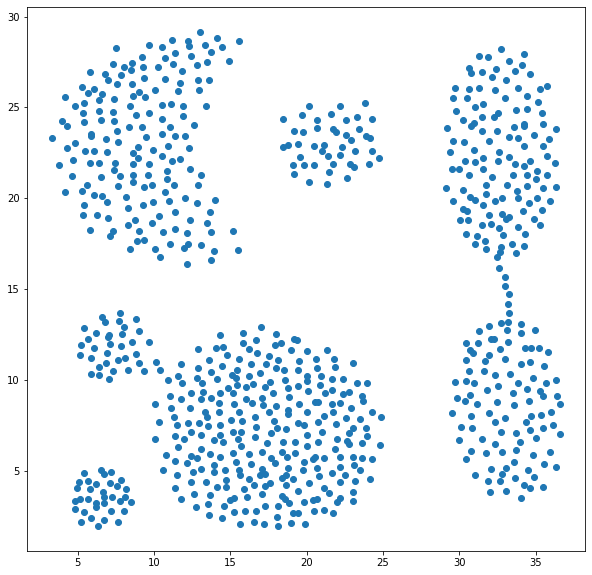

In [3]:
#Making scatter plot of the data
plt.figure(figsize=(10,10))
plt.scatter(x_point, y_point)
plt.show()

In [4]:
#Calculate Ecludian Distance
def getEucludianDistance(xpoints_data,xpoints_centroid,ypoints_data,ypoints_centroid):
    return math.sqrt((xpoints_data-xpoints_centroid)**2+(ypoints_data-ypoints_centroid)**2)

In [5]:
#Generate Random K points
def getRandomPoints(min, max):
    point = []
    xpoint = np.random.uniform(low=min, high=max)
    ypoint = np.random.uniform(low=min, high=max)
    
    point.append(xpoint)
    point.append(ypoint)
    return point

In [6]:
#Generate Random Point
def getRandomCentroid(total_centroid):
    c_points = []
    for point in range(total_centroid):
        if point%2 == 1:
            c_points.append(getRandomPoints(1,(25-point)))
        else:
            c_points.append(getRandomPoints(1,(30-point)))
    
    return c_points    

In [7]:
#calculate centroid
def calculateEucludianCentroid(centroid):
    centroid_points = []
    c_val = []
    for c_urutan in range(len(centroid)):
        for urutan in range(len(kelas)):
            c_val.append(getEucludianDistance(x_point[urutan],centroid[c_urutan][0],y_point[urutan],centroid[c_urutan][1]))
        centroid_points.append(c_val)
        c_val = []
    return centroid_points

In [8]:
#compare each centroid#needrevision
def compareCentroid(c_points):
    for first in range(0, len(c_points)):
        if first != len(c_points)-1:
            for second in range(first+1, len(c_points)):
                for count in range(len(kelas)):
                    if (c_points[first][count] > c_points[second][count]):
                        c_points[second][count] = 0
                    else:
                        c_points[first][count] = 0
    return c_points

In [9]:
#Centering centroid #err
def centeringCentroid(centroid_data):
    c_data = []
    position = []
    for c_count in range(len(centroid_data)):
        c_postion = []
        plus = 0
        for data_count in range(len(kelas)):
            if (centroid_data[c_count][data_count] != 0):
                plus = plus + 1
                c_postion.append(data_count)
        position.append(c_postion)
        c_data.append(plus)
    new_centroid = []
    for c_count in range(len(centroid_data)):
        centroid = []
        xsum = 0
        ysum = 0
        if c_data[c_count] != 0 :
            point = position[c_count]
            for count in range(len(point)):
                xsum = xsum + x_point[point[count]]
                ysum = ysum + y_point[point[count]]
            centroid.append(xsum/c_data[c_count])
            centroid.append(ysum/c_data[c_count])
            xsum = 0
            ysum = 0
        new_centroid.append(centroid)
    return new_centroid

In [10]:
def loopingKMeans(k):
    firstcentroid = getRandomCentroid(k)
    euclidian_calculate = calculateEucludianCentroid(firstcentroid)
    compared_centroid = compareCentroid(euclidian_calculate)
    position_change = centeringCentroid(compared_centroid)
    new_centroid =[x for x in position_change if x]
    old_centroid = firstcentroid
    
    while new_centroid != old_centroid:
        old_centroid = firstcentroid
        firstcentroid = new_centroid
        euclidian_calculate = calculateEucludianCentroid(firstcentroid)
        compared_centroid = compareCentroid(euclidian_calculate)
        position_change = centeringCentroid(compared_centroid)
        new_centroid =[x for x in position_change if x]
    
    #Making scatter plot of the data
    x = []
    y = []
    for count in range(len(new_centroid)):
        x.append(new_centroid[count][0])
        y.append(new_centroid[count][1])
    plt.figure(figsize=(10,10))
    plt.scatter(x_point, y_point)
    plt.scatter(x, y, marker="o", s=30**2)
    plt.show()
    return compared_centroid


In [11]:
def defineClass(centroid_data):
    position = []
    for c_count in range(len(centroid_data)):
        c_postion = []
        for data_count in range(len(kelas)):
            if (centroid_data[c_count][data_count] != 0):
                c_postion.append(data_count)
        position.append(c_postion)
        
    class_calc = []
    class_value = []
    for count in range(len(position)):
        new_class = []
        class_val = []
        for subcount in range(len(position[count])):
            new_class.append(position[count][subcount])
            class_val.append(count)
        class_calc.append(class_val)
        class_value.append(new_class)
    return class_calc, class_value

In [12]:
class_calc, class_val = defineClass(compared_centroid)
class_calc = [x for x in class_calc if x]
class_val = [x for x in class_val if x]

new_class = []

for urutan in range(len(kelas)):
    for count in range(len(class_val)):
        for subcount in range(len(class_val[count])):
            if urutan == class_val[count][subcount]:
                new_class.append(class_calc[count][subcount])

NameError: name 'compared_centroid' is not defined

In [13]:
def sumSquaredError(centroid_data):
    c_data = []
    position = []
    for c_count in range(len(centroid_data)):
        c_postion = []
        plus = 0
        for data_count in range(len(kelas)):
            if (centroid_data[c_count][data_count] != 0):
                plus = plus + 1
                c_postion.append(data_count)
        position.append(c_postion)
        c_data.append(plus)
    sum_square = []
    
    for c_count in range(len(centroid_data)):
        centroid = []
        xsum = 0
        ysum = 0
        if c_data[c_count] != 0 :
            point = position[c_count]
            for count in range(len(point)):
                xsum = xsum + (centroid_data[c_count][0] - x_point[point[count]])**2
                ysum = ysum + (centroid_data[c_count][1] - y_point[point[count]])**2
            centroid.append(xsum)
            centroid.append(ysum)
        sum_square.append(centroid)
    return sum_square[len(centroid_data)-1]

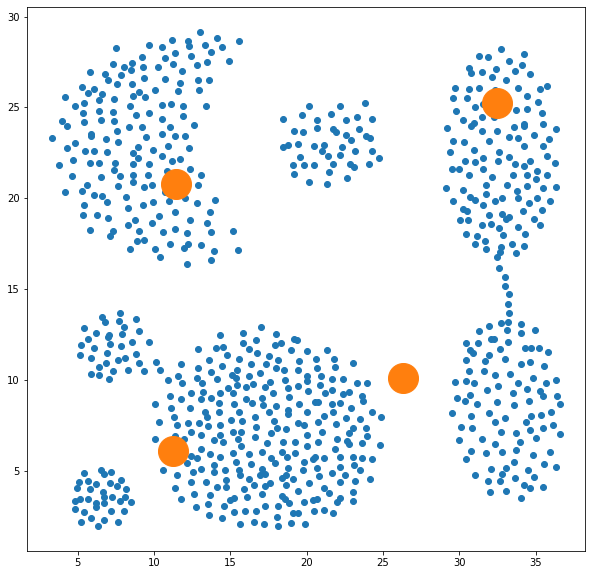

In [14]:
k1 = loopingKMeans(7)


In [ ]:
k1 = loopingKMeans(7)
k2 = loopingKMeans(14)
k3 = loopingKMeans(21)
k4 = loopingKMeans(28)
k5 = loopingKMeans(35)
k6 = loopingKMeans(42)
k7 = loopingKMeans(49)

sum_square = []
sum_square.append(sumSquaredError(k1))
sum_square.append(sumSquaredError(k2))
sum_square.append(sumSquaredError(k3))
sum_square.append(sumSquaredError(k4))
sum_square.append(sumSquaredError(k5))
sum_square.append(sumSquaredError(k6))
sum_square.append(sumSquaredError(k7))
print(sum_square)
x = [7,14,21,28,35,42,49]
y = []
for count in range(len(sum_square)):
    y.append(sum_square[count][1])
plt.scatter(x,y)
plt.show()